## Week 4 Lab exercises

In this week we will continue to practise the use of classes, and the numerical solution of higher order non linear ordinary differential equations (ODEs). 

In [24]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import isclose
import doctest

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

In [25]:
# def demo_doctest():
#     """
#     Demonstrate how doctest works.

#     >>> a = 1
#     >>> b = 2
#     >>> a + b
#     0
#     """

#     return -1

# demo_doctest()
# doctest.testmod()
# doctest.testmod(verbose=True)
# doctest.testmod(report=True)
# doctest.testmod(raise_on_error=True)

In [26]:
# ar = list(range(5))
# for i, x in enumerate(ar[:-1]):
#     print(i)

### ACTIVITY 1: Implement the midpoint method

I have written a class below for integrating equations that implements the Euler method. Update it to include the midpoint method and (OPTIONALLY) a 4th order Runge-Kutta method (from scratch, not just by including solve_ivp()!). Be sure to add in asserts to sense check what the class is doing.

#### `ExplicitIntegrator` class

In [27]:
# ExplicitIntegrator class

class ExplicitIntegrator :

    """
    Contains explicit methods to integrate ODEs

    attributes: the function to calculate the gradient dydt, max_time,
                N_time_steps, method

    methods: calculate_solution, plot_solution

    Example usage:
    >>> calculate_logistic_dydt = (lambda t, y : y*(1 - y))
    >>> logistic_integrator = ExplicitIntegrator(dydt=calculate_logistic_dydt, max_time=5.0, N_time_steps=5, method="Euler")
    >>> logistic_integrator.calculate_solution(y0=np.array([0.5]))
    >>> print(logistic_integrator.y_solution)
    [0.5        0.75       0.9375     0.99609375 0.99998474 1.        ]

    Adjust the parameters:
    >>> logistic_integrator.max_time = 10.0
    >>> logistic_integrator.N_time_steps = 10
    >>> logistic_integrator.calculate_solution(y0=np.array([0.5]))
    >>> print(logistic_integrator.y_solution)
    [0.5        0.75       0.9375     0.99609375 0.99998474 1.
     1.         1.         1.         1.         1.        ]

    Use a different method:
    >>> logistic_integrator.method = "MidPoint"
    >>> logistic_integrator.calculate_solution(y0=np.array([0.5]))
    >>> print(logistic_integrator.y_solution)
    [0.5        0.734375   0.8742113  0.94000359 0.97079047 0.98559589
     0.99284831 0.99643676 0.99822153 0.99911155 0.99955597]
    """


    integration_methods = ["Euler", "MidPoint", "RK4"]

    # constructor function
    def __init__(self, dydt, max_time=0, N_time_steps=0, method = "Euler"):

        self.dydt = dydt # Note that we are passing in a function, this is ok in python
        self.method = method
        assert self.method in self.integration_methods, 'chosen integration method not implemented'

        # Make these private - restrict getting and setting as below
        self._max_time = max_time
        self._N_time_steps = N_time_steps

        # Derived from the values above
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, max_time, N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    # Enables the user to get the t solution, y solution and other arguments
    @property
    def y_solution(self):   return self._y_solution
    @property
    def t_solution(self):   return self._t_solution
    @property
    def max_time(self):     return self._max_time
    @property
    def N_time_steps(self): return self._N_time_steps
    @property
    def delta_t(self):      return self._delta_t

    # Enables the user to reset the max time
    @max_time.setter
    def max_time(self, value):
        self._max_time = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    # Enables the user to reset the number of time steps
    @N_time_steps.setter
    def N_time_steps(self, value):
        self._N_time_steps = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    def calculate_solution(self, y0) :
        if (self.method == "Euler") :
            self.integrate_using_Euler(self.dydt, y0)
        elif (self.method == "MidPoint") :
            self.integrate_using_midpoint(self.dydt, y0)
        elif (self.method == "RK4") :
            self.integrate_using_RK4(self.dydt, y0)
        else :
            assert False, 'integration method not implemented'

    def plot_solution(self) :

        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.plot(self._t_solution, self._y_solution, '-',
                 label=self.method + " delta_t is " + str(self._delta_t))
        plt.legend()

    # We don't use parameter `dydt_function` ???
    def integrate_using_Euler(self, dydt_function, y0) :

        for itime, time in enumerate(self.t_solution) :
            if itime == 0 :
                self._y_solution[itime] = y0
                old_time = time
            else :
                dydt_at_t = self.dydt(old_time, self._y_solution[itime-1])
                self._y_solution[itime] = (self._y_solution[itime-1] +
                                          dydt_at_t * self._delta_t)
                old_time = time


    # My answer!
    # We don't use parameter `dydt_function` ???
    def integrate_using_midpoint(self, dydt_function, y0) :

        """
        >>> calculate_logistic_dydt = (lambda t, y : y*(1 - y))
        >>> logistic_integrator = ExplicitIntegrator(dydt=calculate_logistic_dydt, max_time=5.0, N_time_steps=5, method="Euler")
        >>> logistic_integrator.integrate_using_midpoint(dydt_function=None, y0=np.array([0.5]))
        >>> print(logistic_integrator.y_solution)
        [0.5        0.734375   0.8742113  0.94000359 0.97079047 0.98559589]

        """

        # For readability by trying to match common notation
        y       = self._y_solution
        t       = self._t_solution
        dydt    = self.dydt
        delta_t = self._delta_t

        y[0]  =  y0
        # Update forward, end at the before-last timestep
        for i, t_i in enumerate(t[:-1]):
            # First, calculate gradient at current timestep
            gradient_at_t_i  =  dydt(t_i, y[i])
            # Intermediate estimation: estimate y at midpoint and
            # use it to calculate gradient
            assert isclose(t_i + delta_t, t[i+1]), (
                f"""The distance from current timestep t[i]={t_i}
                to the next time step t[i+1] must equal delta_t={delta_t}.
                Expected : t[i+1] = {t_i + delta_t}
                Got      : t[i+1] = {t[i+1]}
                """
            )
            t_midpoint            =  t_i + (0.5 * delta_t)
            y_midpoint            =  y[i] + (gradient_at_t_i * (0.5 * delta_t))
            gradient_at_midpoint  =  dydt(t_midpoint, y_midpoint)
            # Finally, use gradient at midpoint to
            # estimate y in next timestep
            y[i+1]  =  y[i] + (gradient_at_midpoint * delta_t)


    # # Original solution!
    # # We don't use parameter `dydt_function` ???
    # def integrate_using_midpoint(self, dydt_function, y0) :
    #     for itime, time in enumerate(self.t_solution) :
    #         if itime == 0 :
    #             self._y_solution[itime] = y0
    #             old_time = time
    #         else :
    #             dydt_at_t = self.dydt(old_time, self._y_solution[itime-1])

    #             y_t_plus_half = (self._y_solution[itime-1] + 0.5 *
    #                                       dydt_at_t * self._delta_t)

    #             t_plus_half = old_time + 0.5*self._delta_t

    #             dydt_at_t_plus_half = self.dydt(t_plus_half, y_t_plus_half)

    #             self._y_solution[itime] = (self._y_solution[itime-1] +
    #                                       dydt_at_t_plus_half * self._delta_t)
    #             old_time = time


    # We don't use parameter `dydt_function` ???
    def integrate_using_RK4(self, dydt_function, y0_initial) :

        # For readability and to match wikipedia naming
        h = self._delta_t

        for itime, time in enumerate(self.t_solution) :
            if itime == 0 :
                self._y_solution[itime] = y0_initial
                old_time = time
            else :
                # Using algorithm as in https://en.wikipedia.org/wiki/Runge–Kutta_methods
                y0 = self._y_solution[itime-1]
                k1 = self.dydt(old_time, y0)
                y1 = y0 + 0.5 * h * k1
                k2 = self.dydt(old_time + 0.5 * h, y1)
                y2 = y0 + 0.5 * h * k2
                k3 = self.dydt(old_time + 0.5 * h, y2)
                y3 = y0 + h * k3
                k4 = self.dydt(old_time + h, y3)
                self._y_solution[itime] = y0 + h / 6.0 * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
                old_time = time


doctest.testmod()
# # doctest.testmod(verbose=True)
# # doctest.testmod(report=True)
doctest.testmod(raise_on_error=True)


TestResults(failed=0, attempted=15)

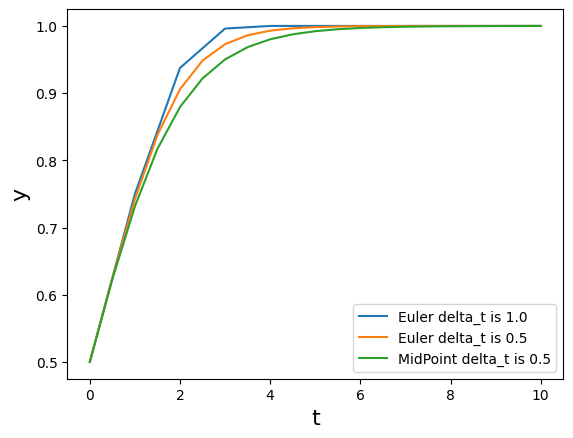

In [28]:

# How to use the class - example for the logistic equation

# Note that the function has to take t as the first argument and y as the second
def calculate_logistic_dydt(t, y):
    """Returns the gradient dy/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 10

# Define an object of the class
logistic_integrator = ExplicitIntegrator(
    dydt         = calculate_logistic_dydt,
    max_time     = max_time,
    N_time_steps = N_time_steps,
    method       = "Euler"
)

# Find and plot the solution
y0 = np.array([0.5])
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
# y_solution_1_with_N_equal_10 = logistic_integrator.y_solution
# print(logistic_integrator.y_solution)

# Update the number of steps and plot again
logistic_integrator.N_time_steps = 20 # Note how this changes the other attributes above
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
# print(logistic_integrator.y_solution)

# Change the method
logistic_integrator.method = "MidPoint"
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
# print(logistic_integrator.y_solution)


# Call the method directly
logistic_integrator.integrate_using_midpoint(
    dydt_function=None, y0=y0
)
# logistic_integrator.plot_solution()
# print(logistic_integrator.y_solution)

In [29]:
# calculate_logistic_dydt = (lambda t, y : y*(1 - y))
# logistic_integrator = ExplicitIntegrator(dydt=calculate_logistic_dydt, max_time=5.0, N_time_steps=5, method="Euler")
# logistic_integrator.integrate_using_midpoint(dydt_function=None, y0=np.array([0.5]))
# print(logistic_integrator.y_solution)
# # [0.5        0.75       0.9375     0.99609375 0.99998474 1.        ]


### ACTIVITY 2: Test `ExplicitIntegrator` class
    
Test the above integrator class on one of the simple differential equations that we have studied so far, and confirm that the convergence orders you obtain when doubling the resolution for each method are as expected.

In [30]:
# Lets try a decay with a source
def calculate_dydt(t, y):
    dydt = - y + np.sin(t)
    return dydt

In [31]:
# (Little bit of history: Took the repeated code and make it into a shared function)
def plot_solution(order : float, logistic_integrator : ExplicitIntegrator) -> None:
    y0 = np.array([2.0])
    N_steps_vector = [16,32,64]

    for isteps, N_steps in enumerate(N_steps_vector) :

        logistic_integrator.N_time_steps = N_steps
        logistic_integrator.calculate_solution(y0)

        h = logistic_integrator.delta_t
        if isteps > 0 :
            # Need to take every other entry for the finer resolution
            # so the size of the vectors match
            diff = logistic_integrator.y_solution[::2] - old_solution
            plt.plot(
                logistic_integrator.t_solution[::2],
                diff,
                label=f"error between h = {h} and h = {h/2}"
            )
            if isteps == 1 :
                plt.plot(
                    logistic_integrator.t_solution[::2],
                    diff / order,
                    '--',
                    label="expected High/Medium error"
                )
        old_solution = logistic_integrator.y_solution

    plt.grid()
    plt.legend()
    plt.ylabel("Solution error")
    plt.xlabel("t");

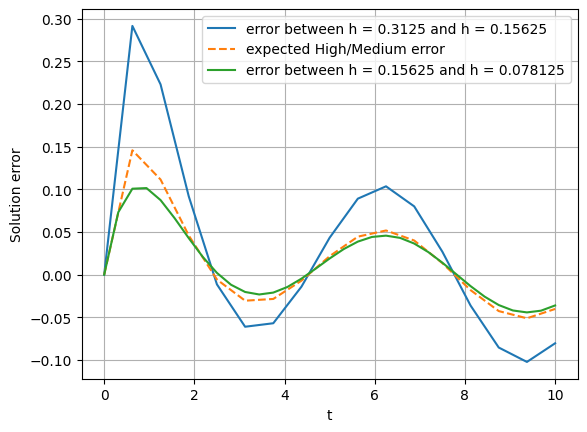

In [32]:
# Test the integrator for the Euler method - error should decrease
# by factor of 2 as it is first order

order = 2.0 ** 1.0  # 2^1 = 2
logistic_integrator = ExplicitIntegrator(
    method       = "Euler",
    dydt         = calculate_dydt,
    max_time     = max_time,
    N_time_steps = N_time_steps,
)
plot_solution(order, logistic_integrator)

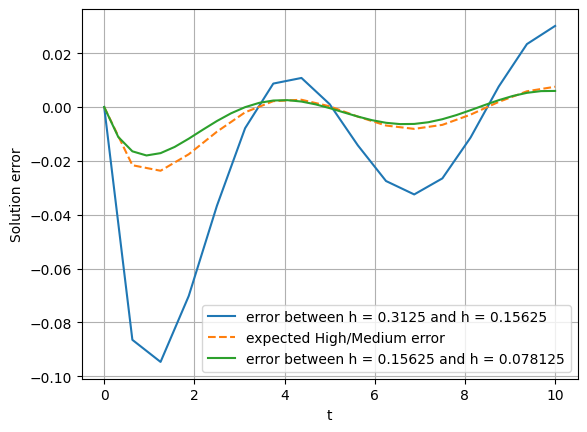

In [33]:
# Test the integrator for the midpoint method - error should decrease
# by factor of 4 as it is second order

order = 2.0 ** 2.0  # 2^2 = 4
logistic_integrator = ExplicitIntegrator(
    method       = "MidPoint",
    dydt         = calculate_dydt,
    max_time     = max_time,
    N_time_steps = N_time_steps,
)
plot_solution(order, logistic_integrator)

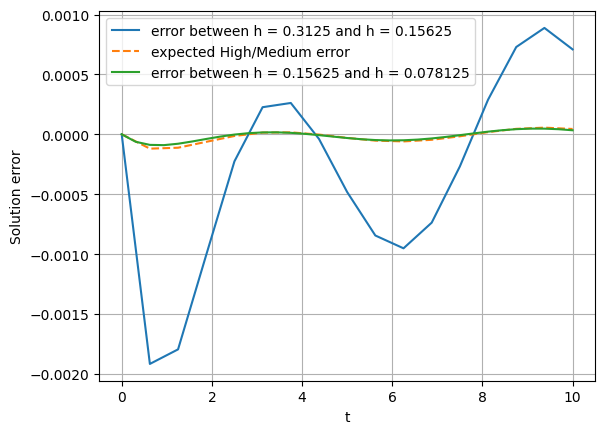

In [34]:
# Test the integrator for the RK4 method - error should decrease
# by factor of 16 as it is 4th order

order = 2.0 ** 4.0  # 2^4 = 16
logistic_integrator = ExplicitIntegrator(
    method       = "RK4",
    dydt         = calculate_dydt,
    max_time     = max_time,
    N_time_steps = N_time_steps,
)
plot_solution(order, logistic_integrator)

### ACTIVITY 3: `VanDerPolOscillator` class

Write a class that contains information about the Van der Pol oscillator with a source, and solves the second order ODE related to its motion using scipy's solve_IVP method:

$\frac{d^2y}{dt^2} + 2a (1-y^2) \frac{dy}{dt} + y = f(t)$

where $a$ is a damping factor. Your class should allow you to pass in the source function f(t) as an argument that can be changed. 

_HINT: It may help to start with the Ecosystem class in the solutions for last week's tutorial and modify this._

What parts or features of the differential equation tell us if it is:

1. Second or first order - it is second order because of the derivatives
2. Autonomous - there is a function of t so it is not autonomous 
3. Linear / non linear - it is non linear because of the y^2 term
4. Dimension 1 or 2 - It is dimension 1, but in first order form it will be dimension 2

What is an oscillator? 

- An oscillator is a system that has a stable equilibrium point and a periodic solution that is not constant.

Please explain oscillator in simpler terms? 

An oscillator is a system that has a balance point that it always wants to return to, like a pendulum hanging straight down. But instead of staying still, it moves back and forth in a repeating pattern, like a clock ticking. This movement is not constant, meaning it changes over time, but it always comes back to the same balance point.

https://en.wikipedia.org/wiki/Oscillation

Uhmm... What is the **Van der Pol oscillator**? 

It is a non linear oscillator that can be used to model a variety of phenomena, including the heart beat. It is described by the following differential equation: 

$$\frac{d^2y}{dt^2} + 2a(1-y^2)\frac{dy}{dt} + y = f(t)$$

where $a$ is a damping factor.

https://en.wikipedia.org/wiki/Van_der_Pol_oscillator

We have the following differential equation for the Van der Pol oscillator:

$$\frac{d^2y}{dt^2} + 2a(1-y^2)\frac{dy}{dt} + y = f(t)$$


Let $v$ = $\frac{dy}{dt}$, then we can write the above equation as a system of first order ODEs:

$$\frac{dy}{dt} = v$$

$$\frac{dv}{dt} = f(t) - 2a(1-y^2)v - y$$

Let's derive $\frac{dv}{dt}$ step-by-step:

$$\frac{dv}{dt} = \frac{d}{dt}(\frac{dy}{dt})$$

$$\frac{dv}{dt} = \frac{d^2y}{dt^2}$$

$$\frac{dv}{dt} = f(t) - 2a(1-y^2)\frac{dy}{dt} - y$$

$$\frac{dv}{dt} = f(t) - 2a(1-y^2)v - y$$



<!-- 
In code: 

```python
    def _dydt(self, t, y):
        y_t = y[0]
        v_t = y[1]

        dydt = np.zeros_like(y)

        # This is dydt, which is just v
        dydt[0] = v_t
        # This is dvdt, which is the VDP equation
        dydt[1] = 2.0 * self.a * (1 - y_t * y_t) * v_t - y_t + self._f_of_t(t)

        return dydt
```

```python
    y_t = y[0]
    v_t = y[1]

    dydt = np.zeros_like(y)

    # This is dydt, which is just v
    dydt[0] = v_t
    # This is dvdt, which is the VDP equation
    dydt[1] = 2.0 * self.a * (1 - y_t * y_t) * v_t - y_t + self._f_of_t(t)
``` -->


In [47]:
class VanDerPolOscillator:

    """
    Definition - a class to contain a Van Der Pol non linear
    damped oscillator.

       attributes: damping factor a, forcing function f_of_t,
       lifetime of oscillations, plus private attributes for the solutions

       methods: to integrate the VDP equation, and produce plots of
       the solution and phase plots

    Example usage:
    >>> my_f_of_t = lambda t : 0.0
    >>> a_damping = 0.1
    >>> my_oscillator = VanDerPolOscillator(my_f_of_t, a_damping, lifetime=40)
    >>> my_oscillator.integrate_VDP_equation(initial_value=np.array([1.0, 1.0]), N_time_steps=5)
    >>> print(my_oscillator._solution_y)
    [ 1.          0.56214536 -0.36980234 -0.08590347  0.08483192  0.00916777]
    """
    # [ 1.          0.99816457 -1.81385432 -0.61212713  1.99338362  0.08482746]
    # constructor function
    def __init__(self, f_of_t, a=0.0, lifetime = 1.0):
        self.a = a
        self._f_of_t = f_of_t
        self.lifetime = lifetime
        self._solution_v = []
        self._solution_y = []
        self._solution_t = []
        self._solution_solved = False

    def integrate_VDP_equation(self, initial_value, N_time_steps=100) :
        delta_t = self.lifetime / N_time_steps
        t_solution = np.linspace(0.0, self.lifetime, N_time_steps+1)
        solution = solve_ivp(self.calculate_VDP_dydt, [0,self.lifetime],
                        initial_value, t_eval=t_solution)

        self._solution_t = solution.t
        self._solution_y = solution.y[0]
        self._solution_v = solution.y[1]
        self._solution_solved = True

    def calculate_VDP_dydt(self, t, y) :
        """

        Returns the gradient dy/dt for the Van Der Pol equations

        $$  \frac{d^2y}{dt^2}  +  2a(1-y^2)\frac{dy}{dt}  +  y  =  f(t)  $$

        d^2y/dt^2  +  2a(1-y^2)dy/dt  +  y  =  f(t)

        **THIS IS WHAT I HAVE TO DO! I HAVE TO DERIVE THE EQUATIONS BELOW!**

        $$\frac{dy}{dt} = v$$

        $$\frac{dv}{dt} = f(t) - 2a(1-y^2)v - y$$

        dy/dt = v

        dv/dt = f(t) - 2a(1-y^2)v - y

        In code:

        """

        y_t = y[0]
        v_t = y[1]

        dydt = np.zeros_like(y)

        # This is dydt, which is just v
        dydt[0] = v_t
        # This is dvdt, which is the VDP equation
        # dydt[1] = 2.0 * self.a * (1 - y_t * y_t) * v_t - y_t + self._f_of_t(t)
        dydt[1] = -2.0 * self.a * (1 - y_t * y_t) * v_t - y_t + self._f_of_t(t)

        return dydt



    # Not mathematical. Just for plotting
    def plot_solution(self) :

        assert self._solution_solved, "solution has not yet been found"

        plt.grid()
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.plot(self._solution_t, self._solution_v, 'r-', label="solve for v")
        plt.plot(self._solution_t, self._solution_y, 'g-', label="solve for y")
        plt.legend();



    # Not mathematical. Just for plotting
    def plot_phase_plot(self) :

        assert self._solution_t.size != 0, "solution has not yet been found"

        plt.grid()
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16)
        plt.plot(self._solution_y, self._solution_v);



doctest.testmod()
# # doctest.testmod(verbose=True)
# # doctest.testmod(report=True)
doctest.testmod(verbose=False, raise_on_error=True)


TestResults(failed=0, attempted=20)

In [43]:
# def my_f_of_t(t) :
#     return 0.0

# lifetime = 40
# a_damping = 0.1

# my_oscillator = VanDerPolOscillator(
#     my_f_of_t,
#     a_damping,
#     lifetime
# )

# y0 = np.array([1.0, 1.0])
# steps = 5

# my_oscillator.integrate_VDP_equation(y0, steps)
# my_oscillator.plot_phase_plot()
# print(my_oscillator._solution_y)

In [48]:
from ipywidgets import interact, widgets

def update_parameters(lifetime, a_damping, y0_0, y0_1, steps):
    y0 = np.array([y0_0, y0_1])
    my_oscillator.lifetime = lifetime
    my_oscillator.a = a_damping
    my_oscillator.integrate_VDP_equation(
        y0,
        steps
    )
    my_oscillator.plot_phase_plot()
    # my_oscillator.plot_solution()
    print(my_oscillator._solution_y)

# Initial parameters
lifetime = 40
a_damping = 0.1

y0 = np.array([1.0, 1.0])
steps = 5

my_oscillator = VanDerPolOscillator(
    my_f_of_t,
    a_damping,
    lifetime
)

my_oscillator.integrate_VDP_equation(y0, steps)
# my_oscillator.plot_phase_plot()
print(my_oscillator._solution_y)

# Create interactive widgets to update parameters
interact(update_parameters,
         lifetime=widgets.FloatSlider(min=1, max=100, step=1, value=my_oscillator.lifetime),
         a_damping=widgets.FloatSlider(min=0, max=1, step=0.01, value=a_damping),
         y0_0=widgets.FloatSlider(min=-5, max=5, step=0.1, value=y0[0]),
         y0_1=widgets.FloatSlider(min=-5, max=5, step=0.1, value=y0[1]),
         steps=widgets.IntSlider(min=1, max=100, step=1, value=steps));


[ 1.          0.56214536 -0.36980234 -0.08590347  0.08483192  0.00916777]


interactive(children=(FloatSlider(value=40.0, description='lifetime', min=1.0, step=1.0), FloatSlider(value=0.…

### ACTIVITY 4: Plot $f(t) = 0$

Initially set $f(t) = 0$. 

Add a method to make a phase plot $(y, dy/dt)$ of the solutions for a range of initial conditions. What do you observe about the behaviour?

[1.         1.03918527 1.07668373 ... 0.24266715 0.1642034  0.08482746]


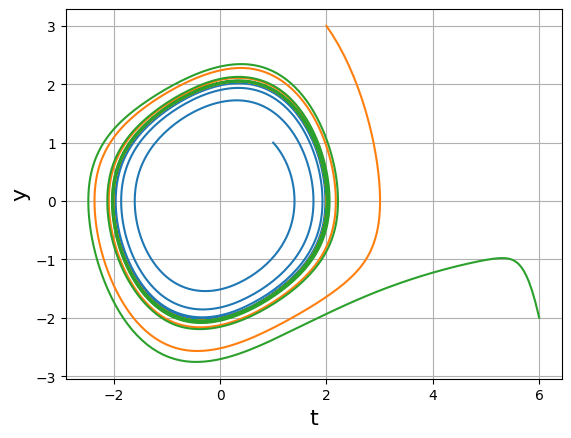

In [ ]:
# Phase plot - we observe limit cycles for the oscillator - there is an attractor solution
# If we start within it we spiral outwards, if outside we spiral in to it

def my_f_of_t(t) :
    return 0.0

lifetime = 40
a_damping = 0.1
my_oscillator = VanDerPolOscillator(my_f_of_t, a_damping, lifetime)
y0 = np.array([1.0, 1.0])
steps = 1000
my_oscillator.integrate_VDP_equation(y0, steps)
my_oscillator.plot_phase_plot()
print(my_oscillator._solution_y)

y0 = np.array([2.0, 3.0])
my_oscillator.integrate_VDP_equation(y0, steps)
my_oscillator.plot_phase_plot()

y0 = np.array([6.0, -2.0])
my_oscillator.integrate_VDP_equation(y0, steps)
my_oscillator.plot_phase_plot()

### ACTIVITY 5: Plot $f(t) = \sin(\omega t)$

Now set $f(t) = \sin(\omega t)$. For what values of $\omega$ do the methods start to fail? Why?

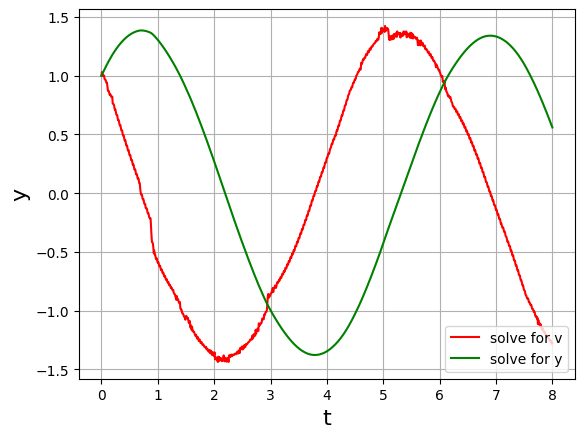

In [ ]:
# For very high frequencies we lose resolution on the oscillations from the driving force

def my_f_of_t(t) :
    omega = 1000.0
    return 10. * np.sin(omega*t)

lifetime = 8
a_damping = 0.001
my_oscillator = VanDerPolOscillator(
    my_f_of_t,
    a_damping,
    lifetime
)
y0 = np.array([1.0, 1.0])
steps = 1000
my_oscillator.integrate_VDP_equation(y0, steps)
my_oscillator.plot_solution()